# ETL Pipeline - 2024 Polling Data

## Objectives

* Load the raw polling dataset.
* Inspect the dataset structure and look for key variables.
* Convert any date fields encountered into a usable date/time format.
* Remove duplicates and handle any missing values.
* Save a cleaned dataset for use in later notebooks.

## Inputs

* generic_ballot_polls.csv (Downloaded from [(https://www.kaggle.com/datasets/iamtanmayshukla/2024-u-s-election-generic-ballot-polling-data)]
* Python libraries (pandas, numpy, os)

## Outputs

* A cleaned dataset will be saved to : data/clean/generic_ballot_polls_clean.csv
* This cleaned dataset will be used in all later notebooks. 



---

# Section 1 - Loading The Raw Data and Core Statistical concepts with examples

In this section, we will be : 
* Loading the raw CSV file.
* Previewing the dataset.
* Inspecting the dataset types, missing values and summary statistics.
* Demonstrating basic statistical and probability concepts using the polling dataset. 

This will be useful in understanding the dataset before working with it.

In [16]:
import pandas as pd
from pathlib import Path
import os

BASE_DIR = Path().resolve().parent  # goes one level up
df = pd.read_csv(BASE_DIR / "data" / "raw" / "generic_ballot_polls.csv")


This has loaded the Raw CSV file into a Pandas dataframe and loaded relevant libraries.

In [17]:
stats = df[['dem', 'rep']].agg(['mean', 'median', 'std', 'var']).transpose()
stats.rename(columns={'std': 'Std Dev', 'var': 'Variance'}, inplace=True)
stats

,mean,median,Std Dev,Variance
dem,44.544903,45.0,2.017888,4.071874
rep,43.834416,43.0,2.248153,5.054194


Core Statistical Concepts :

Before performing data analysis, it's important to review some key concepts:

- **Mean**: The average of all values in a dataset. Provides a central tendency.
- **Median**: The middle value, useful when data has outliers.
- **Standard Deviation (SD)**: Measures how spread out the values are.
- **Variance**: Square of SD, another measure of dispersion.
- **Hypothesis Testing**: Determines if observed data differs significantly from expected outcomes.
- **Probability Distributions**: Describes the likelihood of different outcomes. Common distributions include Normal, Binomial, and Poisson.

These principles form the foundation for analyzing polling data, understanding trends, and interpreting predictions.

Example Probability Insight :
 Let's calculate the probability that a randomly selected poll shows a Democratic lead:

In [18]:
# Probability that Dem > Rep
dem_lead_prob = (df['dem'] > df['rep']).mean()
print(f"Probability that Democrats lead in a poll: {dem_lead_prob:.2f}")


Probability that Democrats lead in a poll: 0.65


Visualization :
A histogram showing the distribution of poll support for each party:

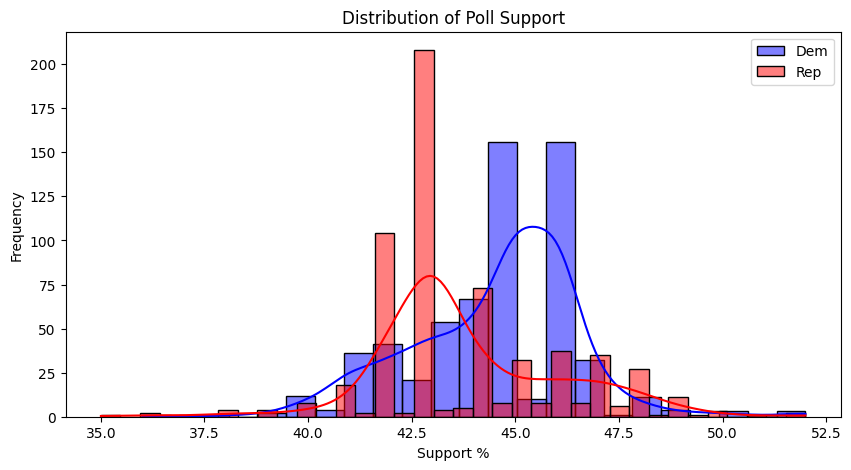

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['dem'], color='blue', label='Dem', kde=True, alpha=0.5)
sns.histplot(df['rep'], color='red', label='Rep', kde=True, alpha=0.5)
plt.xlabel('Support %')
plt.ylabel('Frequency')
plt.title('Distribution of Poll Support')
plt.legend()
plt.show()


In [20]:
df.info

<bound method DataFrame.info of      poll_id  pollster_id         pollster sponsor_ids   sponsors  \
0      87781         1102          Emerson         NaN        NaN   
1      87760          568           YouGov         352  Economist   
2      87774          320         Monmouth         NaN        NaN   
3      87791         1347           Cygnal         NaN        NaN   
4      87696          568           YouGov         352  Economist   
..       ...          ...              ...         ...        ...   
611    83698         1189  Morning Consult         NaN        NaN   
612    83699         1189  Morning Consult         NaN        NaN   
613    83700         1189  Morning Consult         NaN        NaN   
614    83701         1189  Morning Consult         NaN        NaN   
615    83702         1189  Morning Consult         NaN        NaN   

                              display_name  pollster_rating_id  \
0                          Emerson College                  88   
1      

This has given us an overview of the dataset, showing column names, data types and non-null counts, helping us identify missing data and column types.

In [21]:
df.describe(include='all')


,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,cycle,office_type,seat_number,seat_name,election_date,stage,nationwide_batch,dem,rep,ind
count,616.000000,616.000000,616,193,193,616,616.000000,616,576.000000,576.000000,...,616.0,616,0.0,616,616,616,616,616.000000,616.000000,0.0
unique,NaN,NaN,47,31,31,47,NaN,45,NaN,NaN,...,NaN,1,NaN,1,1,1,1,NaN,NaN,NaN
top,NaN,NaN,Morning Consult,352,Economist,Morning Consult,NaN,Morning Consult,NaN,NaN,...,NaN,U.S. House,NaN,Generic,11/5/24,general,False,NaN,NaN,NaN
freq,NaN,NaN,269,59,59,269,NaN,269,NaN,NaN,...,NaN,616,NaN,616,616,616,616,NaN,NaN,NaN
mean,84598.071429,1060.521104,NaN,NaN,NaN,NaN,280.863636,NaN,1.912674,-0.226910,...,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,44.544903,43.834416,NaN
std,1564.734963,433.561353,NaN,NaN,NaN,NaN,166.227147,NaN,0.668623,0.736635,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.017888,2.248153,NaN
min,81694.000000,194.000000,NaN,NaN,NaN,NaN,37.000000,NaN,0.500000,-1.300000,...,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,35.000000,NaN
25%,83517.750000,568.000000,NaN,NaN,NaN,NaN,218.000000,NaN,1.800000,-0.600000,...,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,43.000000,NaN
50%,83671.500000,1189.000000,NaN,NaN,NaN,NaN,218.000000,NaN,1.800000,-0.200000,...,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,43.000000,NaN
75%,85911.000000,1189.000000,NaN,NaN,NaN,NaN,385.000000,NaN,2.400000,-0.200000,...,2024.0,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,45.015000,NaN


This has provided summary statistics for numeric and categorical columns, allowing us to inspect distributions, ranges and identify potential anomalies.

In [22]:
df.isna().sum()

poll_id                      0
pollster_id                  0
pollster                     0
sponsor_ids                423
sponsors                   423
display_name                 0
pollster_rating_id           0
pollster_rating_name         0
numeric_grade               40
pollscore                   40
methodology                 30
transparency_score         377
state                      616
start_date                   0
end_date                     0
sponsor_candidate_id       616
sponsor_candidate          616
sponsor_candidate_party    616
question_id                  0
sample_size                  8
population                   0
subpopulation              615
population_full              0
tracking                   347
created_at                   0
notes                      610
url                          0
source                     616
internal                   596
partisan                   543
race_id                      0
cycle                        0
office_t

This is showing the number of missing values in each column. Key columns with missing values will need to be handled in the ETL process.

---

# Section 2 - Data Cleaning

In this section, we will : 
* Convert date columns.
* Drop duplicate values.
* Remove any rows with missing key values.
* Select columns that will be useful to work with.

In [23]:
date_cols = ["start_date", "end_date"]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

C:\Users\harry\AppData\Local\Temp\ipykernel_500\3790147647.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\harry\AppData\Local\Temp\ipykernel_500\3790147647.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


This has converted the start_date and end_date columns to a date/time format, allowing time based analysis and ensures that dates are handled properly in later steps.

In [24]:
df = df.drop_duplicates()
df.shape

(616, 41)

This has removed duplicate rows to ensure that each poll is only represented once, ensuring they don't clutter the dataset.

In [25]:
keep_cols = [
    "start_date", "end_date", "pollster", "sample_size", 
    "dem", "rep", "methodology", "pollster_rating_id",
    "numeric_grade"
]
df = df[keep_cols]
df.head()

,start_date,end_date,pollster,sample_size,dem,rep,methodology,pollster_rating_id,numeric_grade
0,2024-08-12,2024-08-14,Emerson,1000.0,47.5,45.5,IVR/Online Panel/Text-to-Web,88,2.9
1,2024-08-11,2024-08-13,YouGov,1407.0,45.0,44.0,Online Panel,391,2.9
2,2024-08-08,2024-08-12,Monmouth,801.0,48.0,46.0,Live Phone/Text-to-Web,215,2.9
3,2024-08-06,2024-08-08,Cygnal,1500.0,46.4,47.1,NaN,67,2.1
4,2024-08-04,2024-08-06,YouGov,1413.0,45.0,44.0,Online Panel,391,2.9


This has selected the most relevant columns for our analysis, keeping the dataset more focused and easier to work on.

In [26]:
df = df.dropna(subset=["sample_size", "dem", "rep"])
df.isna().sum()

start_date             0
end_date               0
pollster               0
sample_size            0
dem                    0
rep                    0
methodology           24
pollster_rating_id     0
numeric_grade         40
dtype: int64

This has removed rows where key values (sample_size, dem, rep) are missing. This ensures that further analysis on poll results are based on valid data. 

In [27]:
def clean_methodology(method):
    if pd.isna(method):
        return "unknown"
    method = method.lower()
    if "live phone" in method or ("text" in method and "text-to-web" not in method):
        return "phone"
    elif "online" in method or "text-to-web" in method:
        return "online"
    elif "probability" in method:
        return "panel"
    else:
        return "unknown"

df['methodology'] = df['methodology'].apply(clean_methodology)

# Quick check
df['methodology'].value_counts()

methodology
online     546
phone       30
unknown     24
panel        8
Name: count, dtype: int64

Normalize methodology values to simplify charts.

In [28]:
df = df.reset_index(drop=True)
df.head()

,start_date,end_date,pollster,sample_size,dem,rep,methodology,pollster_rating_id,numeric_grade
0,2024-08-12,2024-08-14,Emerson,1000.0,47.5,45.5,online,88,2.9
1,2024-08-11,2024-08-13,YouGov,1407.0,45.0,44.0,online,391,2.9
2,2024-08-08,2024-08-12,Monmouth,801.0,48.0,46.0,phone,215,2.9
3,2024-08-06,2024-08-08,Cygnal,1500.0,46.4,47.1,unknown,67,2.1
4,2024-08-04,2024-08-06,YouGov,1413.0,45.0,44.0,online,391,2.9


This resets the index after cleaning so we have a clean index for easier referencing to work on.

---

# Section 3 - Save The Cleaned Dataset

In this section we will : 
* Create a clean folder for the cleaned dataset (if required)
* Save the cleaned dataset in the new folder.

In [29]:
clean_path = BASE_DIR / "data" / "clean" / "generic_ballot_polls_clean.csv"

os.makedirs(BASE_DIR / "data" / "clean", exist_ok=True)
df.to_csv(clean_path, index=False)

clean_path

WindowsPath('E:/VS Code Projects/us_2024_polling_data_analysis_tool/data/clean/generic_ballot_polls_clean.csv')

The cleaned dataset is saved to data/clean/generic_ballot_polls_clean.csv. If data/clean does not exist, it is created during this step.

---

# Conclusions and Next Steps

# Conclusions
* The raw dataset has been loaded, inspected and cleaned.
* Duplicate rows and rows with missing key values were removed. 
* Date columns are now in proper date/time format.
* Only relevant columns have been retained during the process.
* Methodology values have been normalized to simplify visualizations.
* The cleaned dataset is saved and ready for use.

# Next Steps
* Explore the trends in polling results over time.
* Analyze pollster performance and identify potential bias.
* Compare methodologies (online vs telephone) and sample sizes. 
* Visualize the results with line charts, scatter plots and summary statistics. 
* Prepare any additional features or aggregations that may be required for predictive modeling. 

---